<a href="https://colab.research.google.com/github/StevTobs/TimeSeries_Python/blob/master/Time_Series_with_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initial Code

In [1]:
#--------installation in Colab -----------
!pip install -U -q PyDrive #for load data from google drive with PyDrive

In [2]:

#Authenticate and create the PyDrive client. 
def Initial_googleDrive( PATH_googleDrive, PATH_googleDrive_id ):

  from pydrive.auth import GoogleAuth 
  from pydrive.drive import GoogleDrive 
  from google.colab import auth 
  from oauth2client.client import GoogleCredentials 
  from google.colab import files
  #Authenticate and create the PyDrive client. 
  auth.authenticate_user() 
  gauth = GoogleAuth() 
  gauth.credentials = GoogleCredentials.get_application_default() 
  drive = GoogleDrive(gauth) 
  your_module = drive.CreateFile({'id':PATH_googleDrive_id}) 
  your_module.GetContentFile( PATH_googleDrive )
  #------------------------ 

In [3]:
import pandas as pd
#some version do not support plotting in line of Matplotlib
%matplotlib inline 

# Time series with Pandas
Table of Contents
   * [DataTime Index Basic](#DataTimeIndexBasic)
   * [Time Resapling](#TimeResapling)
   * [Time Shifting](#TimeShifting)
   * [Rolling and Expanding](#RollingandExpanding)
   * [Time Series Visualization](#TimeSeriesVisualization)
   * [Time Series Project Exercise](#TimeSeriesProjectExercise)
    
    


## DataTime Index Basic <a class="anchor" id="DataTimeIndexBasic"></a>

In [ ]:
# None Pandas

In [ ]:
from datetime import datetime

In [ ]:
my_year = 2020
my_month = 1
my_day = 2
my_hour = 13
my_min = 30
my_sec = 15

Create **datetime object**

In [ ]:
#shift tab
my_date = datetime(my_year, my_month, my_day)

In [ ]:
my_date

datetime.datetime(2020, 1, 2, 0, 0)

In [ ]:
my_date_time = datetime(my_year, my_month, my_day, my_hour, my_min, my_sec)

In [ ]:
#tab
my_date_time

datetime.datetime(2020, 1, 2, 13, 30, 15)

In [ ]:
my_date_time.day

2

In [ ]:
my_date_time.hour

13

In [ ]:
type(my_date_time)

datetime.datetime

#### NumPy Date Ranges
Just as <tt>np.arange(start,stop,step)</tt> can be used to produce an array of evenly-spaced integers, we can pass a <tt>dtype</tt> argument to obtain an array of dates. Remember that the stop date is <em>exclusive</em>.

In [ ]:
import numpy as np

In [ ]:
# Just string
np.array(['200-03-15','2020-03-16','2020-03-17'])

array(['200-03-15', '2020-03-16', '2020-03-17'], dtype='<U10')

In [ ]:
# Datetime object specification
np.array(['2020-03-15','2020-03-16','2020-03-17'],dtype='datetime64') #means 64bit
#D is day

array(['2020-03-15', '2020-03-16', '2020-03-17'], dtype='datetime64[D]')

In [ ]:
np.array(['200-03-15','2020-03-16','2020-03-17'],dtype='datetime64[Y]') #Y is day

array(['0200', '2020', '2020'], dtype='datetime64[Y]')

In [ ]:
np.array(['200-03-15','2020-03-16','2020-03-17'],dtype='datetime64[h]') #h is hour

array(['0200-03-15T00', '2020-03-16T00', '2020-03-17T00'],
      dtype='datetime64[h]')

In [ ]:
np.arange(0,10,2)

array([0, 2, 4, 6, 8])

In [ ]:
#apply day step 
np.arange('2018-06-01','2018-06-23',7, dtype='datetime64[D]')

array(['2018-06-01', '2018-06-08', '2018-06-15', '2018-06-22'],
      dtype='datetime64[D]')

In [ ]:
#Every data (becareful every hours)
np.arange('1968','1976',dtype='datetime64[Y]')

array(['1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975'],
      dtype='datetime64[Y]')

#### Pandas Datetime Index

We'll usually deal with time series as a datetime index when working with pandas dataframes. Fortunately pandas has a lot of functions and methods to work with time series!<br>
For more on the pandas DatetimeIndex visit https://pandas.pydata.org/pandas-docs/stable/timeseries.html

In [ ]:
import pandas as pd

The simplest way to build a DatetimeIndex is with the <tt><strong>pd.date_range()</strong></tt> method:

In [ ]:
pd.date_range('2020-01-01',periods=7,freq='D') # ความละเอียดระดับ nano second.

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.date_range('Jan 01, 2018',periods=7,freq='D')

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07'],
              dtype='datetime64[ns]', freq='D')

<div class="alert alert-info"><strong>DatetimeIndex Frequencies:</strong> When we used <tt>pd.date_range()</tt> above, we had to pass in a frequency parameter <tt>'D'</tt>. This created a series of 7 dates spaced one day apart. We'll cover this topic in depth in upcoming lectures, but for now, a list of time series offset aliases like <tt>'D'</tt> can be found <a href='http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases'>here</a>.</div>

Another way is to convert incoming text with the <tt><strong>pd.to_datetime()</strong></tt> method:

In [ ]:
pd.to_datetime(['1/2/2018','Jan 03, 2018'])

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

A third way is to pass a list or an array of datetime objects into the <tt><strong>pd.DatetimeIndex()</strong></tt> method:

In [ ]:
pd.to_datetime(['2/1/2018','3/1/2018'])#UK Style is not working

DatetimeIndex(['2018-02-01', '2018-03-01'], dtype='datetime64[ns]', freq=None)

In [ ]:
pd.to_datetime(['2/1/2018','3/1/2018'], format='%d/%m/%Y') #Europion

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [ ]:
pd.to_datetime(['2--1--2018','3--1--2018'], format='%d--%m--%Y')

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

Notice that even though the dates came into pandas with a day-level precision, pandas assigns a nanosecond-level precision with the expectation that we might want this later on.

To set an existing column as the index, use <tt>.set_index()</tt><br>
><tt>df.set_index('Date',inplace=True)</tt>

#### Pandas Datetime Analysis

In [ ]:
data = np.random.randn(3,2)
cols = ['A','B']
print(data)

[[ 0.10495133  1.59207935]
 [-0.49124923  0.55600237]
 [ 0.58519203  0.18345926]]


In [ ]:
idx = pd.date_range('2020-01-01', periods=3, freq='D')

df = pd.DataFrame(data, index=idx, columns=cols)

In [ ]:
df

,A,B
2020-01-01,0.104951,1.592079
2020-01-02,-0.491249,0.556002
2020-01-03,0.585192,0.183459


In [ ]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03'], dtype='datetime64[ns]', freq='D')

In [ ]:
df.index.max()

Timestamp('2020-01-03 00:00:00', freq='D')

In [ ]:
df.index.argmax()

2

In [ ]:
df.index.min()

Timestamp('2020-01-01 00:00:00', freq='D')

In [ ]:
df.index.argmin()

0

<div class="alert alert-info"><strong>NOTE:</strong> Normally we would find index locations by running <tt>.idxmin()</tt> or <tt>.idxmax()</tt> on <tt>df['column']</tt> since <tt>.argmin()</tt> and <tt>.argmax()</tt> have been deprecated. However, we still use <tt>.argmin()</tt> and <tt>.argmax()</tt> on the index itself.</div>


___

## Time Resapling <a class="anchor" id="TimeResapling"></a>

In [4]:
#@title
import pandas as pd

In [5]:
pwd

'/content'

In [ ]:
#--------Colab-----------
# To import from google drive of 'starbick.csv' 
# https://drive.google.com/file/d/11Em1TurJJcYlLgHoEB4MYo1H8ejQHP3o/view?usp=sharing 

PATH_googleDrive_id = '11Em1TurJJcYlLgHoEB4MYo1H8ejQHP3o'
PATH_googleDrive = 'starbucks.csv'
Initial_googleDrive( PATH_googleDrive, PATH_googleDrive_id )

In [9]:
PATH = PATH_googleDrive
df = pd.read_csv(PATH, index_col = 'Date')

In [10]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [19]:
df.info()#To see the amout of dta

<class 'pandas.core.frame.DataFrame'>
Index: 1006 entries, 2015-01-02 to 2018-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1006 non-null   float64
 1   Volume  1006 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 23.6+ KB


In [20]:
df.index

Index(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
       '2015-01-09', '2015-01-12', '2015-01-13', '2015-01-14', '2015-01-15',
       ...
       '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20', '2018-12-21',
       '2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31'],
      dtype='object', name='Date', length=1006)

In [21]:
df = pd.read_csv(PATH, index_col = 'Date', parse_dates=True)

In [22]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [23]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

__resample()__

A common operation with time series data is resampling based on the time series index. Let's see how to use the resample() method. [[reference](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html)]

When calling `.resample()` you first need to pass in a **rule** parameter, then you need to call some sort of aggregation function.

The **rule** parameter describes the frequency with which to apply the aggregation function (daily, monthly, yearly, etc.)<br>
It is passed in using an "offset alias" - refer to the table below. [[reference](http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)]

The aggregation function is needed because, due to resampling, we need some sort of mathematical rule to join the rows (mean, sum, count, etc.)

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

In [24]:
# dailt ---> yearly
df.resample(rule='A').mean()
# .max()
# .min()
# .std()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


In [25]:
def first_day(entry):
    
    # IS THERE AN ENTRY??
    if len(entry) :
        #IF SO, RETURN FIRST ENTRY
        return entry[0]
        

In [26]:
#Apply for seing the first day
#Use apply method for applying your custom function
df.resample(rule='A').apply(first_day)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


In [27]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


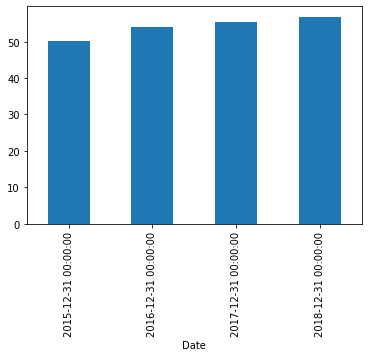

In [28]:
%matplotlib inline
df['Close'].resample('A').mean().plot.bar()

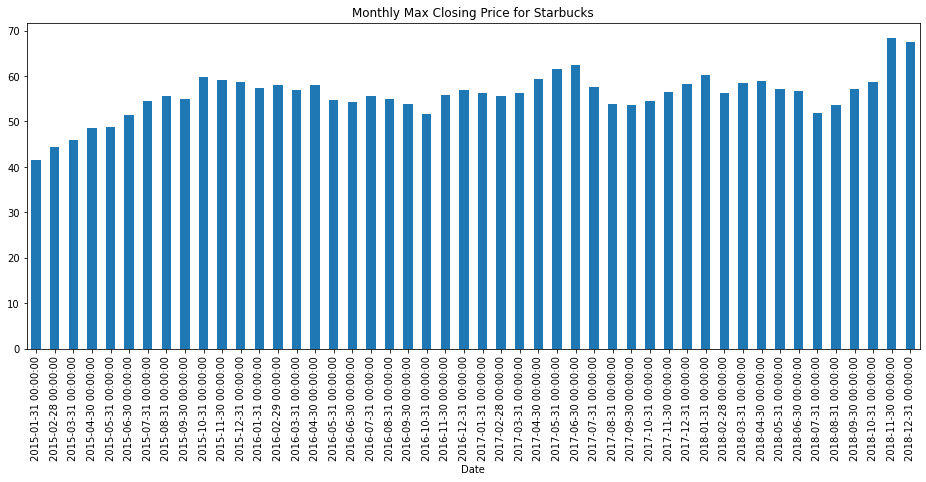

In [31]:
title = 'Monthly Max Closing Price for Starbucks'
df['Close'].resample('M').max().plot.bar(figsize=(16,6), title=title, color='#1f77b4')

## Time Shifting <a class="anchor" id="TimeShifting"></a>

In [4]:
import pandas as pd

In [ ]:
PATH_googleDrive_id = '11Em1TurJJcYlLgHoEB4MYo1H8ejQHP3o'
PATH_googleDrive = 'starbucks.csv'
Initial_googleDrive( PATH_googleDrive, PATH_googleDrive_id )

PATH = PATH_googleDrive
df = pd.read_csv(PATH, index_col = 'Date', parse_dates=True)

#### See the last: df.tail()

In [20]:
df.tail() 

,Close,Volume
Date,,
2018-12-24,60.56,6323252
2018-12-26,63.08,16646238
2018-12-27,63.20,11308081
2018-12-28,63.39,7712127
2018-12-31,64.40,7690183


In [24]:
df.shift(1).tail() #Shift every row down: 1

,Close,Volume
Date,,
2018-12-24,61.39,23524888.0
2018-12-26,60.56,6323252.0
2018-12-27,63.08,16646238.0
2018-12-28,63.20,11308081.0
2018-12-31,63.39,7712127.0


In [26]:
df.shift(-1).tail() #Shift every row up: 1

,Close,Volume
Date,,
2018-12-24,63.08,16646238.0
2018-12-26,63.20,11308081.0
2018-12-27,63.39,7712127.0
2018-12-28,64.40,7690183.0
2018-12-31,NaN,NaN


In [30]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [31]:
df.shift(periods=1, freq='M').head(10)

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548
2015-01-31,37.2361,27556706
2015-01-31,37.4415,10021486
2015-01-31,37.7401,11040702
2015-01-31,37.5301,9295084


In [33]:
df.shift(1,fill_value=0).head() #If you do not need to fill with n/a, you can specify using fill_value parameter

,Close,Volume
Date,,
2015-01-02,0.0000,0
2015-01-05,38.0061,6906098
2015-01-06,37.2781,11623796
2015-01-07,36.9748,7664340
2015-01-08,37.8848,9732554


## Rolling and Expanding <a class="anchor" id="RollingandExpanding"></a>



### Rolling
A common process with time series is to create data based off of a rolling mean. The idea is to divide the data into "windows" of time, and then calculate an aggregate function for each window. In this way we obtain a <em>simple moving average</em>. Let's show how to do this easily with pandas!

In [34]:
import pandas as pd

In [35]:
%matplotlib inline

In [39]:
PATH_googleDrive_id = '11Em1TurJJcYlLgHoEB4MYo1H8ejQHP3o'
PATH_googleDrive = 'starbucks.csv'
Initial_googleDrive( PATH_googleDrive, PATH_googleDrive_id )

PATH = PATH_googleDrive
df = pd.read_csv(PATH, index_col = 'Date', parse_dates=True)

In [40]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


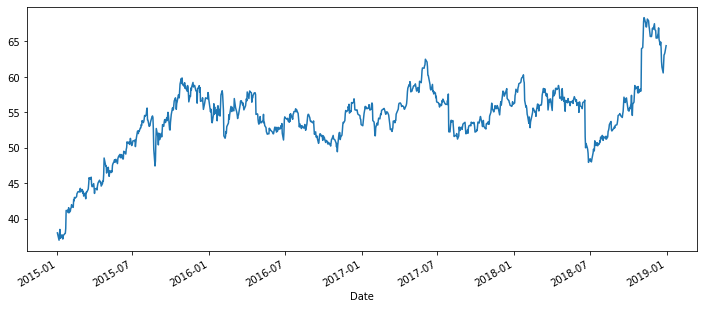

In [41]:
df['Close'].plot(figsize=(12,5))

Now let's add in a rolling mean! This rolling method provides row entries, where every entry is then representative of the window. 

In [45]:
df.rolling(window=7).mean().head(10) #the 7th will the average of 7 data before including itself

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
2015-01-09,NaN,NaN
2015-01-12,37.616786,1.238222e+07
2015-01-13,37.578786,1.297288e+07
2015-01-14,37.614786,1.264020e+07


The easiest way to add a legend is to make the rolling value a new column, then pandas does it automatically!

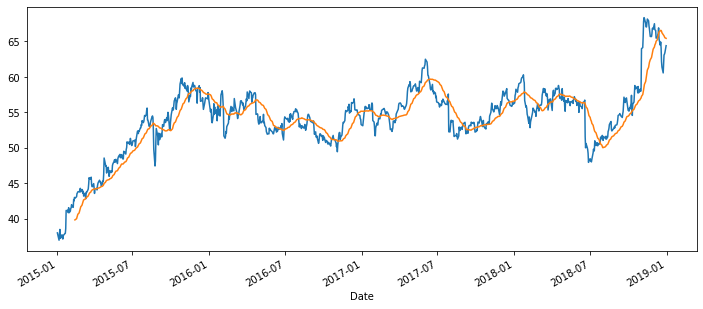

In [47]:
# 30 days rolling
df['Close'].plot(figsize=(12,5))
df.rolling(window=30).mean()['Close'].plot()

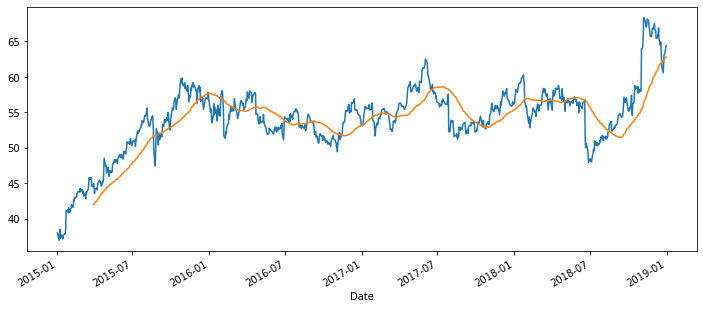

In [48]:
# 60 days rolling
df['Close'].plot(figsize=(12,5))
df.rolling(window=60).mean()['Close'].plot()

In [49]:
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()

In [51]:
df.head()

,Close,Volume,Close: 30 Day Mean
Date,,,
2015-01-02,38.0061,6906098,NaN
2015-01-05,37.2781,11623796,NaN
2015-01-06,36.9748,7664340,NaN
2015-01-07,37.8848,9732554,NaN
2015-01-08,38.4961,13170548,NaN


### Expanding

Instead of calculating values for a rolling window of dates, what if you wanted to take into account everything from the start of the time series up to each point in time? For example, instead of considering the average over the last 7 days, we would consider all prior data in our expanding set of averages.

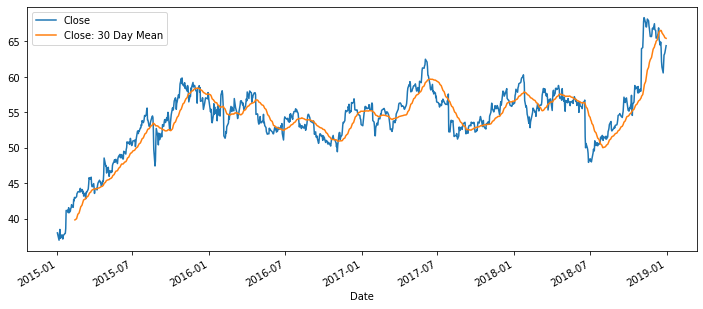

In [54]:
df[['Close','Close: 30 Day Mean']].plot(figsize=(12,5))

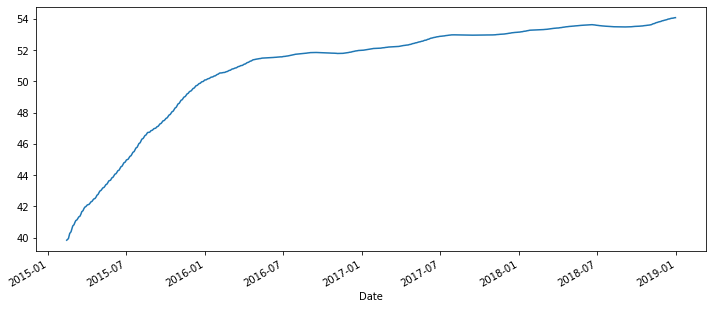

In [68]:
#Average of rolling previous, the last point means the average of all data
#The wingdow keep expanding along with you for whatever up to time expanding up unitil avg. of total column 
df['Close'].expanding(min_periods=30).mean().plot(figsize=(12,5));

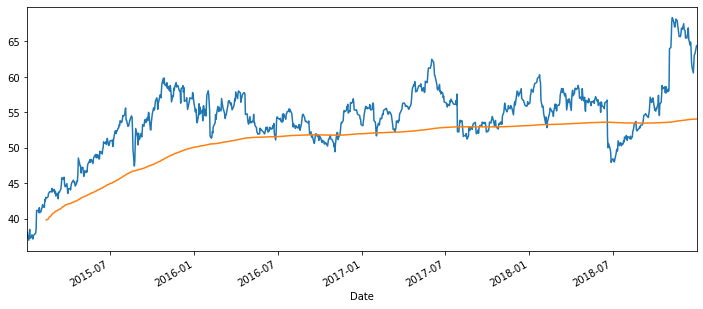

In [67]:
df['Close'].plot(figsize=(12,5)).autoscale(axis='x',tight=True)

# Optional: specify a minimum number of periods to start from
df['Close'].expanding(min_periods=30).mean().plot(figsize=(12,5));

That's it! It doesn't help much to visualize an expanding operation against the daily data, since all it really gives us is a picture of the "stability" or "volatility" of a stock. However, if you do want to see it, simply uncomment the first plot line above and rerun the cell.

Next up, we'll take a deep dive into visualizing time series data!

## Time Series Visualization with Pandas <a class="anchor" id="TimeSeriesVisualization"></a>

In [58]:
df.index #This must be DatetimeIndex if it's not, see the next line.

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [60]:
#Convert the index to DatetimeIndex (if not)
df.index = pd.to_datetime(df.index)

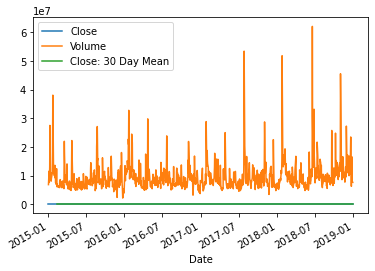

In [62]:
df.plot() #in differnt scale 

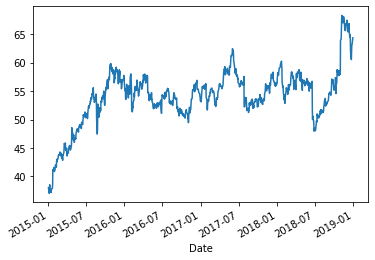

In [63]:
df['Close'].plot()

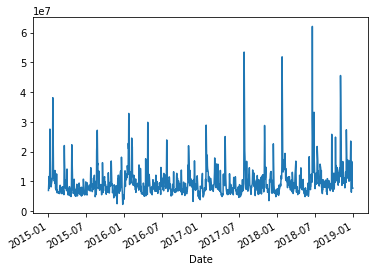

In [64]:
df['Volume'].plot()

### Plot Formatting

#### Title and axis labels
Let's add a title and axis labels to our subplot.
<div class="alert alert-info"><strong>REMEMBER:</strong> <tt><font color=black>ax.autoscale(axis='both',tight=True)</font></tt> is unnecessary if axis limits have been passed into <tt>.plot()</tt>.<br>
If we were to add it, autoscale would revert the axis limits to the full dataset.</div>

<div class="alert alert-info"><strong>NOTE:</strong> While we <em>can</em> pass a title into the pandas <tt>.plot()</tt> function, we can't pass x- and y-axis labels.<br>However, since <tt>.plot()</tt> returns a <tt>matplotlib.axes.AxesSubplot</tt> object, we can set the labels<br>on that object so long as we do it in the same jupyter cell. Setting an <tt>autoscale</tt> is done the same way.</div>

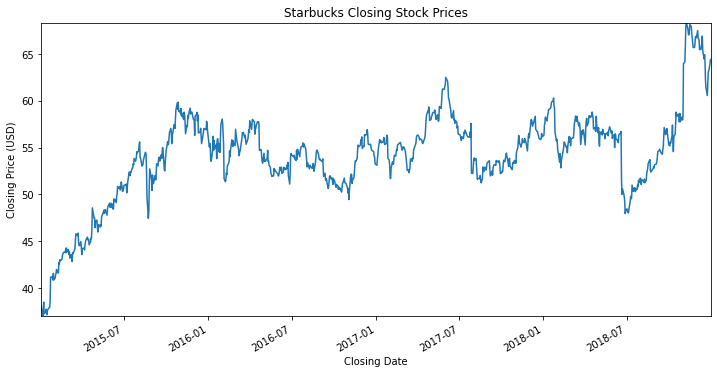

In [70]:
title='Starbucks Closing Stock Prices'
ylabel='Closing Price (USD)'
xlabel='Closing Date'

ax = df['Close'].plot(figsize=(12,6),title=title)
ax.autoscale(axis='both',tight=True) #Auto scale the axises
# ax.autoscale(axis='x',tight=True) #Auto scale the axises
ax.set(xlabel=xlabel, ylabel=ylabel);

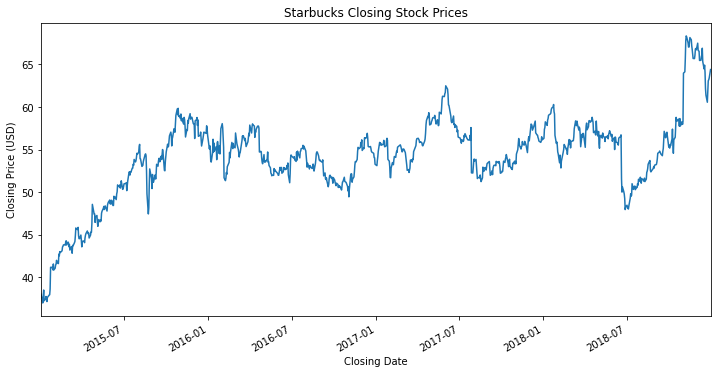

In [71]:
ax = df['Close'].plot(figsize=(12,6),title=title)
# ax.autoscale(axis='both',tight=True) #Auto scale the axises
ax.autoscale(axis='x',tight=True) #Auto scale the axises
ax.set(xlabel=xlabel, ylabel=ylabel);

#### Axis Limits
There are two ways we can set a specific span of time as an x-axis limit. We can plot a slice of the dataset, or we can pass x-limit values as an argument into <tt>df.plot()</tt>.

The advantage of using a slice is that pandas automatically adjusts the y-limits accordingly.

The advantage of passing in arguments is that pandas automatically tightens the x-axis. Plus, if we're also setting y-limits this can improve readability.

**Choosing X Limits by Slice:**

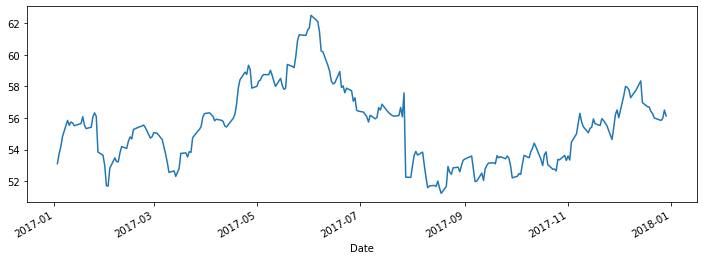

In [74]:
#Crop of the data in some period
df['Close']['2017-01-01':'2017-12-31'].plot(figsize=(12,4))

Choosing X and Y Limits by Slice:

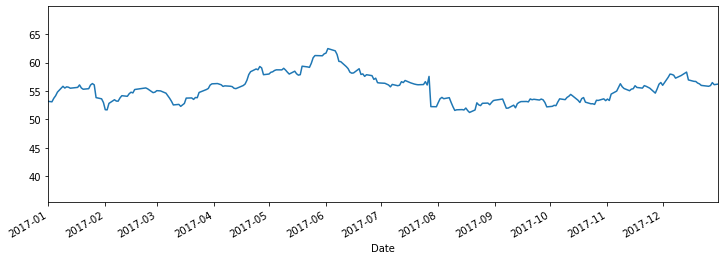

In [77]:
#The same concept!
df['Close'].plot(figsize=(12,4), xlim=['2017-01-01','2017-12-31'])

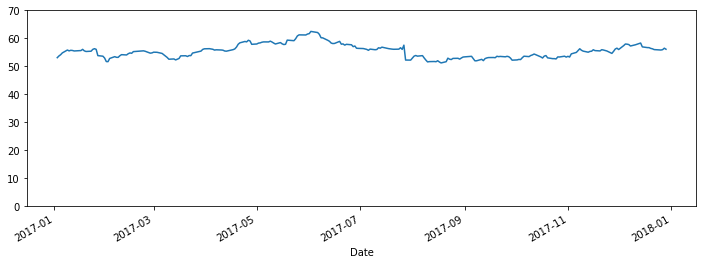

In [78]:
df['Close']['2017-01-01':'2017-12-31'].plot(figsize=(12,4), ylim=[0,70])

#### Color and Style
We can pass arguments into .plot() to change the linestyle and color. Refer to the Customizing Plots lecture from the previous section for more options.

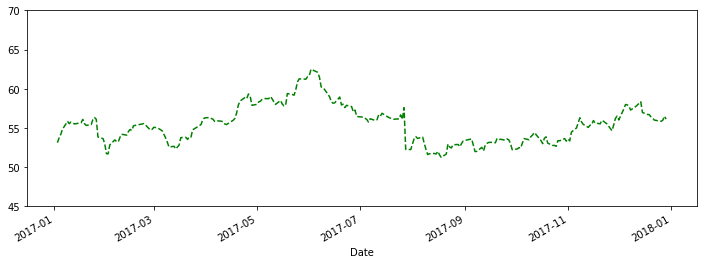

In [80]:
df['Close']['2017-01-01':'2017-12-31'].plot(figsize=(12,4), ylim=[45,70],ls='--',c='green')

<div class="alert alert-info"><strong>NOTE:</strong> It's worth noting that the limit values do <em>not</em> have to appear in the index. Pandas will plot the actual dates based on their location in time.<br><br>Also, another advantage of slicing over arguments is that it's easier to include the upper/lower bound as a limit.<br>That is, <tt><font color=black>df['column']['2017-01-01':].plot()</font></tt> is easier to type than <tt><font color=black>df['column'].plot(xlim=('2017-01-01',df.index.max()))</font></tt></div>

Now let's focus on the y-axis limits to get a better sense of the shape of the data.<br>First we'll find out what upper and lower limits to use.

### X Ticks
In this section we'll look at how to change the format and appearance of dates along the x-axis. To do this, we'll borrow a tool from <tt>matplotlib</tt> called <tt>dates</tt>.

In [82]:
from matplotlib import dates

#### Set the spacing
The x-axis values can be divided into major and minor axes. For now, we'll work only with the major axis and learn how to set the spacing with <tt>.set_major_locator()</tt>.

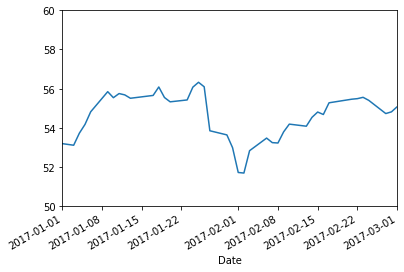

In [86]:
df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[50,60])

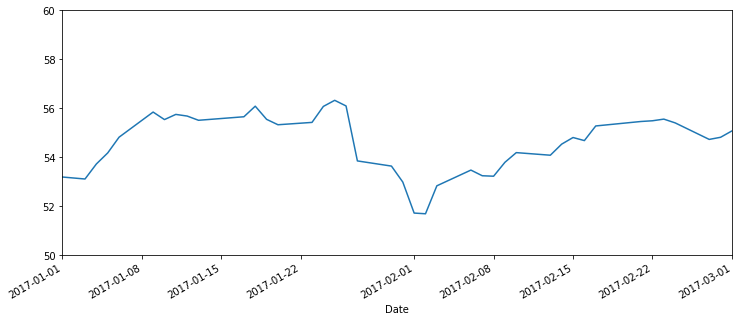

In [87]:
#Changing wilder
df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[50,60],figsize=(12,5))

Notice that dates are spaced one week apart. The dates themselves correspond with <tt>byweekday=0</tt>, or Mondays.<br>
For a full list of locator options available from <tt>matplotlib.dates</tt> visit <a href='https://matplotlib.org/api/dates_api.html#date-tickers'>https://matplotlib.org/api/dates_api.html#date-tickers</a>

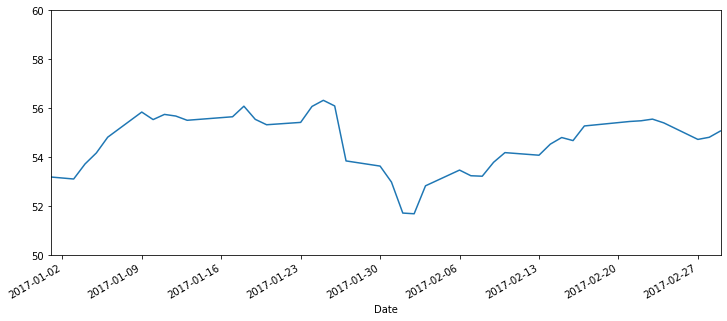

In [91]:
#Seting the new space of the x-axis (see more locating technique on the link upper!)
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[50,60],figsize=(12,5))
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))#xtick on x-axis is arranged nicer 


#### Date Formatting (****)
Formatting follows the Python datetime <strong><a href='http://strftime.org/'>strftime</a></strong> codes.<br>
The following examples are based on <tt>datetime.datetime(2001, 2, 3, 16, 5, 6)</tt>:
<br><br>

<table style="display: inline-block">  
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%Y</td><td>Year with century as a decimal number.</td><td>2001</td></tr>
<tr><td>%y</td><td>Year without century as a zero-padded decimal number.</td><td>01</td></tr>
<tr><td>%m</td><td>Month as a zero-padded decimal number.</td><td>02</td></tr>
<tr><td>%B</td><td>Month as locale’s full name.</td><td>February</td></tr>
<tr><td>%b</td><td>Month as locale’s abbreviated name.</td><td>Feb</td></tr>
<tr><td>%d</td><td>Day of the month as a zero-padded decimal number.</td><td>03</td></tr>  
<tr><td>%A</td><td>Weekday as locale’s full name.</td><td>Saturday</td></tr>
<tr><td>%a</td><td>Weekday as locale’s abbreviated name.</td><td>Sat</td></tr>
<tr><td>%H</td><td>Hour (24-hour clock) as a zero-padded decimal number.</td><td>16</td></tr>
<tr><td>%I</td><td>Hour (12-hour clock) as a zero-padded decimal number.</td><td>04</td></tr>
<tr><td>%p</td><td>Locale’s equivalent of either AM or PM.</td><td>PM</td></tr>
<tr><td>%M</td><td>Minute as a zero-padded decimal number.</td><td>05</td></tr>
<tr><td>%S</td><td>Second as a zero-padded decimal number.</td><td>06</td></tr>
</table>
<table style="display: inline-block">
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%#m</td><td>Month as a decimal number. (Windows)</td><td>2</td></tr>
<tr><td>%-m</td><td>Month as a decimal number. (Mac/Linux)</td><td>2</td></tr>
<tr><td>%#x</td><td>Long date</td><td>Saturday, February 03, 2001</td></tr>
<tr><td>%#c</td><td>Long date and time</td><td>Saturday, February 03, 2001 16:05:06</td></tr>
</table>  
    

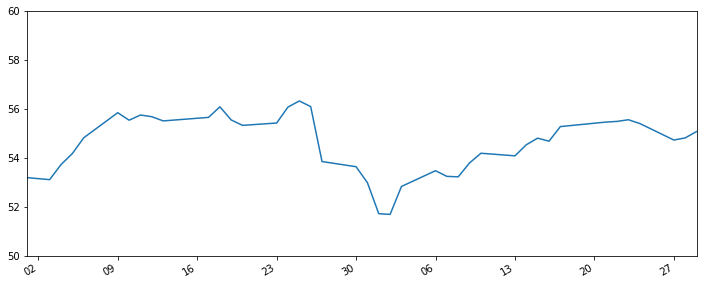

In [101]:
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[50,60],figsize=(12,5))
ax.set(xlabel='')
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))



#### Major vs. Minor Axis Values
All of the tick marks we've used so far have belonged to the major axis. We can assign another level called the <em>minor axis</em>, perhaps to separate month names from days of the month.

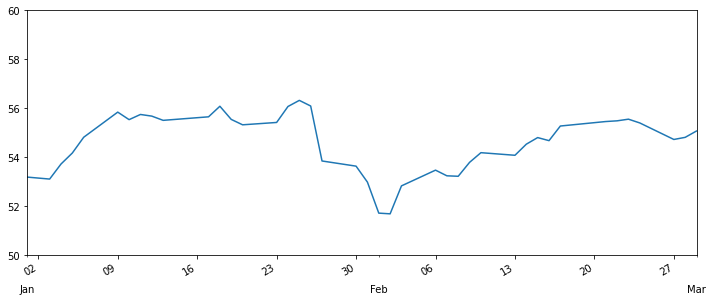

In [102]:
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[50,60],figsize=(12,5))
ax.set(xlabel='')
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b')) #\n is newline


<font color=green><strong>NOTE: </strong>we passed a rotation argument <font color=black><strong>rot=0</strong></font> into <tt><font color=black>df.plot()</font></tt> so that the major axis values appear horizontal, not slanted.

#### Adding Gridlines
We can add x and y axis gridlines that extend into the plot from each major tick mark.

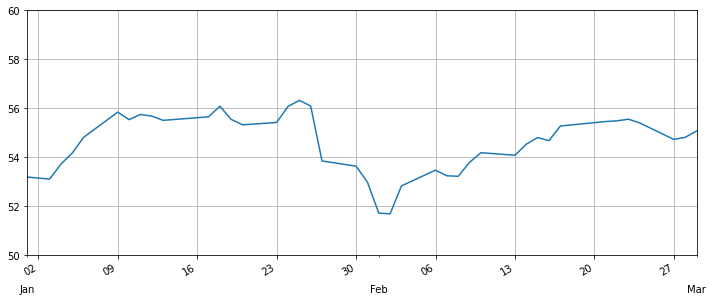

In [103]:
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[50,60],figsize=(12,5))
ax.set(xlabel='')
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b')) #\n is newline

ax.yaxis.grid(True)
ax.xaxis.grid(True)


END




---



## Time Series Project Exercise <a class="anchor" id="TimeSeriesProjectExercise"></a>

## Pandas Time Series Exercise Set #1

For this set of exercises we'll use a dataset containing monthly milk production values in pounds per cow from January 1962 to December 1975.

<div class="alert alert-danger" style="margin: 10px"><strong>IMPORTANT NOTE!</strong> Make sure you don't run the cells directly above the example output shown, <br>otherwise you will end up writing over the example output!</div>

In [271]:
# RUN THIS CELL
import pandas as pd
%matplotlib inline

# https://drive.google.com/file/d/1JD2B1b8sYCeRw3HNg8ZP0op4lAHpeFxm/view?usp=sharing
PATH_googleDrive_id = '1JD2B1b8sYCeRw3HNg8ZP0op4lAHpeFxm'
PATH_googleDrive = 'monthly_milk_production.csv'
Initial_googleDrive( PATH_googleDrive, PATH_googleDrive_id )
PATH = PATH_googleDrive
df = pd.read_csv(PATH, encoding='utf8')
title = "Monthly milk production: pounds per cow. Jan '62 - Dec '75"

print(len(df))
print(df.head(13))

168
       Date  Production
0   1962-01         589
1   1962-02         561
2   1962-03         640
3   1962-04         656
4   1962-05         727
5   1962-06         697
6   1962-07         640
7   1962-08         599
8   1962-09         568
9   1962-10         577
10  1962-11         553
11  1962-12         582
12  1963-01         600


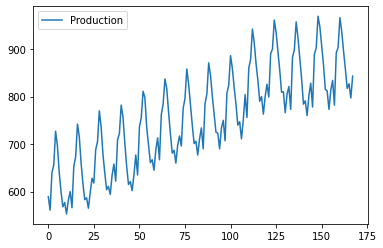

In [272]:
df.plot()

So <tt>df</tt> has 168 records and 2 columns.

#### 1. What is the current data type of the Date column?
HINT: We show how to list column dtypes in the first set of DataFrame lectures.

In [225]:
# CODE HERE
df.info() 
#or

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        168 non-null    object
 1   Production  168 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [226]:
df.dtypes

Date          object
Production     int64
dtype: object

In [141]:
# DON'T WRITE HERE

Date          object
Production     int64
dtype: object

#### 2. Change the Date column to a datetime format

In [273]:
# CODE HERE
df['Date']=pd.to_datetime(df['Date'])
df.dtypes


Date          datetime64[ns]
Production             int64
dtype: object

In [246]:
# DON'T WRITE HERE

Date          datetime64[ns]
Production             int64
dtype: object

#### 3. Set the Date column to be the new index

In [274]:
df.set_index('Date',inplace=True)
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [275]:
# DON'T WRITE HERE

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


#### 4. Plot the DataFrame with a simple line plot. What do you notice about the plot?

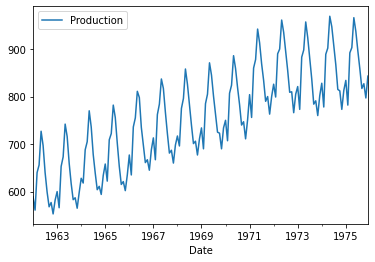

In [278]:
df.plot()

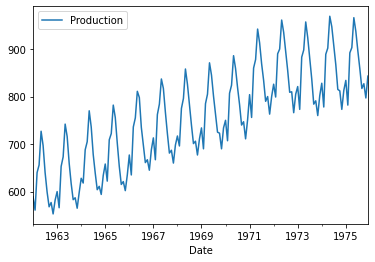

In [279]:
# DON'T WRITE HERE

#### 5. Add a column called 'Month' that takes the month value from the index
HINT: You have to call <tt>df.index</tt> as <tt>df['Date']</tt> won't work.

<strong>BONUS: See if you can obtain the <em>name</em> of the month instead of a number!</strong>

In [307]:
df['Month'] = df.index.month

In [308]:
df.head()

,Production,Month
Date,,
1962-01-01,589,1
1962-02-01,561,2
1962-03-01,640,3
1962-04-01,656,4
1962-05-01,727,5


In [309]:
# DON'T WRITE HERE

,Production,Month
Date,,
1962-01-01,589,1
1962-02-01,561,2
1962-03-01,640,3
1962-04-01,656,4
1962-05-01,727,5


In [311]:
# BONUS SOLUTION:
df['Month'] = df.index.strftime('%B')
df.head()

,Production,Month
Date,,
1962-01-01,589,January
1962-02-01,561,February
1962-03-01,640,March
1962-04-01,656,April
1962-05-01,727,May


### 6. Create a BoxPlot that groups by the Month field

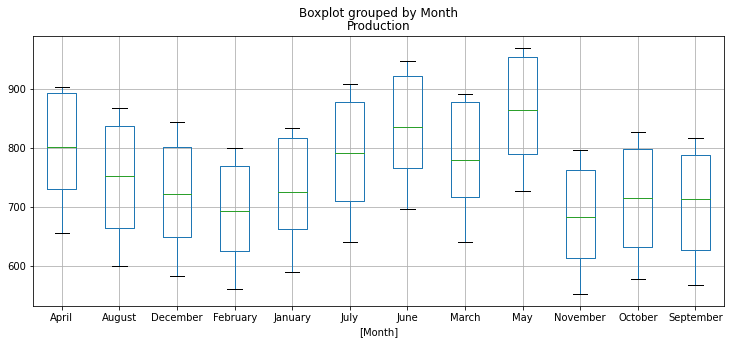

In [312]:
# DON'T WRITE HERE
df.boxplot(by='Month',figsize=(12,5));




---





##  Time Series with Pandas Project Exercise #2

For this exercise, answer the questions below given the dataset: https://fred.stlouisfed.org/series/UMTMVS

This dataset is the Value of Manufacturers' Shipments for All Manufacturing Industries.

**Import any necessary libraries.**

In [ ]:
# CODE HERE

import pandas as pd
%matplotlib inline

# https://drive.google.com/file/d/1cApgCqDF-eNc4KFc7VWjcM_o3NueFuw0/view?usp=sharing
PATH_googleDrive_id = '1cApgCqDF-eNc4KFc7VWjcM_o3NueFuw0'
PATH_googleDrive = 'UMTMVS.csv'
Initial_googleDrive( PATH_googleDrive, PATH_googleDrive_id )
PATH = PATH_googleDrive
df = pd.read_csv(PATH, encoding='utf8')
# title = "Monthly milk production: pounds per cow. Jan '62 - Dec '75"

print(len(df))
print(df.head(13))

**Read in the data UMTMVS.csv file from the Data folder**

**Check the head of the data**

**Set the DATE column as the index.**

**Check the data type of the index.**

**Convert the index to be a datetime index. Note, there are many, many correct ways to do this!**

**Plot out the data, choose a reasonable figure size**

**What was the percent increase in value from Jan 2009 to Jan 2019?**

**What was the percent decrease from Jan 2008 to Jan 2009?**

**What is the month with the least value after 2005?** [HINT](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmin.html)

**What 6 months have the highest value?**

**How many millions of dollars in value was lost in 2008? (Another way of posing this question is what was the value difference between Jan 2008 and Jan 2009)**

**Create a bar plot showing the average value in millions of dollars per year**

**What year had the biggest increase in mean value from the previous year's mean value? (Lots of ways to get this answer!)**

[HINT for a useful method](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.idxmax.html)

**Plot out the yearly rolling mean on top of the original data. Recall that this is monthly data and there are 12 months in a year!**

**BONUS QUESTION (HARD).**

**Some month in 2008 the value peaked for that year. How many months did it take to surpass that 2008 peak? (Since it crashed immediately after this peak) There are many ways to get this answer. NOTE: I get 70 months as my answer, you may get 69 or 68, depending on whether or not you count the start and end months. Refer to the video solutions for full explanation on this.**

In [313]:
#CODE HERE



---

---





Note

In [301]:
df.index.strftime('%b')

Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       ...
       'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
      dtype='object', name='Date', length=168)

In [302]:
df.index.strftime('%Y-%m')

Index(['1962-01', '1962-02', '1962-03', '1962-04', '1962-05', '1962-06',
       '1962-07', '1962-08', '1962-09', '1962-10',
       ...
       '1975-03', '1975-04', '1975-05', '1975-06', '1975-07', '1975-08',
       '1975-09', '1975-10', '1975-11', '1975-12'],
      dtype='object', name='Date', length=168)